## Part 3: Coding: Shortest Paths

8.
(a). Implement (and turn in) a procedure that produces an undirected graph with a large number of nodes (say, 1,000), and connects each pair of nodes by an edge with some probability p (specified as an argument).

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools as itr


def a_8(n, p):
    G = nx.Graph()

    subsets = np.array(list(itr.combinations(list(range(n)),2)))
    prob_list = np.random.uniform(size = len(subsets))
    edge_list = subsets[prob_list <= p]
    G.add_nodes_from(list(range(n)))
    G.add_edges_from(edge_list)
    
    return G
G= a_8(1000, 0.1)

(b). Implement a general shortest-path algorithm for graphs, as described in lecture, that works on your data set. (Turn in your algorithm as part of your homework submission.) Make sure to handle the case where the graph is disconnected (i.e. no shortest path exists), either by outputting “infinity” or a suitably large number.

In [3]:
def find_avg_short(G, subsets):
    total_path = 0
    num_of_connected_pair = len(subsets)
    for pair in subsets:
        a = pair[0]
        b = pair[1]
        nodes_visited = [a]
        visited_last_time = []
        steps = 0
        connect_status = 1
        while b not in nodes_visited:

            visited_this_time = []
            for o in nodes_visited:
                visited_this_time += G.neighbors(o)

            visited_this_time = list(set(visited_this_time))

            if set(visited_this_time) <= set(nodes_visited):
                num_of_connected_pair -= 1
                connect_status = 0
                break
            nodes_visited += visited_this_time
            nodes_visited = list(set(nodes_visited))
            steps += 1
        if connect_status == 1:
            total_path += steps

    return total_path/num_of_connected_pair

(c) Run your shortest-path algorithm on a graph with p = 0.1 many (10,000 or more) times using random pairs of nodes and use it to calculate an estimate of the average shortest path between two nodes in this data set. (Turn in code detailing how you implemented this and a small segment—say, 100 searches—of an execution trace of your code, preferably printing (node A, node B, path length) for each pair and the final average at the end.)

In [4]:
def pairs(G, k):
    n = G.number_of_nodes()
    pairs = np.array(list(itr.combinations(list(range(n)),2)))
    #subsets = np.random.choice(pairs, 100)
    import random
    random_pairs = pairs[random.sample(range(len(pairs)), k)]
    return random_pairs

In [5]:
random_pairs = pairs(G,10000)
answer = find_avg_short(G, random_pairs)
print('The approxiamte average shortest path: ', answer)

The approxiamte average shortest path:  1.8966


(d) Run the shortest-path algorithm on data sets constructed with many values of p (for instance, 0.01 to 0.04 using .01 increments, and then 0.05 to 0.5 using .05 increments). Turn in your numerical data, and plot the average shortest path as a function of p. Note: For p = 0.01 there is actually a small but reasonable chance (around 4%) to produce a disconnected graph. If this occurs, you are free to resample and produce a connected graph for the purposes of gathering data.


In [6]:
import numpy as np
p1 = np.arange(0.01, 0.04, 0.01)
p2 = np.arange(0.05, 0.5, 0.05)

In [7]:
path1 = []
for p in p1:
    G = a_8(1000, p)
    random_pairs = pairs(G,10000)
    answer = find_avg_short(G, random_pairs)
    path1.append(answer)
path1

[3.2524, 2.6381, 2.352]

In [8]:
path2 = []
for p in p2:
    G = a_8(1000, p)
    random_pairs = pairs(G,10000)
    answer = find_avg_short(G, random_pairs)
    path2.append(answer)
path2

[2.0209, 1.906, 1.8557, 1.8033, 1.7491, 1.7059, 1.647, 1.5995, 1.5555]

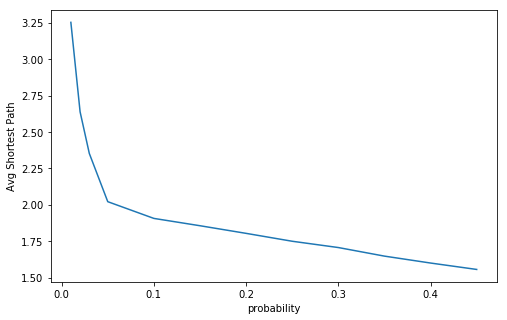

In [31]:
import matplotlib.pyplot as plt
import numpy as np

p3 = list(p1) + list(p2)
path3 = path1 + path2
plt.figure(figsize = (8,5))
plt.xlabel('probability')
plt.ylabel('Avg Shortest Path')
plt.plot(p3, path3)
plt.show()

(e) Intuitively explain the behavior of the data you found; specifically, as p increases (in particular, look at the larger values, e.g. 0.3 and above), what function does the average shortest path length seem to asymptotically approach and why?

  Answer: As p increase, the average shortest path will decreases. Intuitively, when people are more likely to connect with each other, they can more easily reach any person in the network by fewer steps. 
  It seems like the function is approaching y = x + 2. 

9.Now run your code on the Facebook social network data available at: http://snap.stanford.edu/data/egonets-Facebook.html
(In particular, please refer to the file “facebook combined.txt.gz”; the data is formatted as a list of undirected edges between 4,039 nodes, numbered 0 through 4038. You will need to parse this data as part of your code; knowing how to do this will be useful for subsequent assignments!)

(a) Repeat the same analysis as in part c) (i.e. run your algorithm on 10,000 random pairs of nodes and determine the average shortest path length). Turn in your parsing code and a small segment of your execution trace, along with the final average you computed.


In [43]:
#Importing data
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools as itr
import pandas as pd

fb_nw = pd.read_csv('facebook_combined.txt', names = {'edges'})
G2 = nx.Graph()
#G2.add_edges_from(fb_nw['edges'])
#a = list(map(int, fb_nw.edges[1].split(' ')))
fb_nw.edges = list(map(lambda x: x.split(' '), fb_nw.edges))
fb_nw.edges = list(map(lambda x: (int(x[0]), int(x[1])), fb_nw.edges))
G2.add_edges_from(fb_nw.edges)
#G2.add_nodes_from(fb_nw.index)

In [53]:
import time
random_pairs2 = pairs(G2,10000)
answer = find_avg_short(G2, random_pairs2)
t1 = time.time()

In [52]:
print('The approxiamte average shortest path: ', answer)

The approxiamte average shortest path:  3.6839


(b) What is p for the Facebook data? That is, given two random nodes, what is the probabil- ity they are connected by an edge? (You may compute this either precisely or empirically, but you will likely find the former to be easier.)


In [57]:
prob = G2.number_of_edges()/(4039*4038/2)
prob

0.010819963503439287

c) Is the average shortest path length of the Facebook data greater than, equal to, or less than you would expect it to be if it were a random-edge graph with the same number of nodes and value of p? (To answer this, you may wish to run your code from question (8c) using the p you determined in part (9b) and 4039 nodes.) Explain why you think this is the case.

In [58]:
G3 = a_8(4039, prob)

In [62]:
import time
random_pairs2 = pairs(G3,1000)
answer2 = find_avg_short(G3, random_pairs2)

In [63]:
print('The approxiamte average shortest path: ',answer2)

The approxiamte average shortest path:  2.599


Reasoning: The expected average shortest path is much lower than the real average shortest path. This happens because we use the some probability for everyone. So, the likelihood that people connect with each other is same, which apparently cannot be true in real life. The probability will vary largely for different people.